GEOG0125 Advanced Topics in Social and Geographic Data Science (2020-2021) Coursework 1_Datasets
===============

### Landuse Prediction in London

This research will use **Google Streetview images** and landuse data from **OpenStreetMap** to run **Convolutional Neural Network (CNN)**. The prossibility and accuracy for machine learning models to predict landuse can be judged and provide some insights for urban planning field.

OneDrive Link for Datasets: https://liveuclac-my.sharepoint.com/:f:/g/personal/zczlah6_ucl_ac_uk/Et0YHJ-bybxPj-lpcFhNVHEBdtBZ_00KRckconvazNkkmA?e=58Eprk

### 1 Load and clean the dataset

### 1.1 Load package

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import contextily as ctx

In [3]:
# suppress warning 
import warnings
warnings.filterwarnings(action='ignore')

### 1.2 Load datasets

In [5]:
#load dataset
image_point = pd.read_csv('datasets/doi_10.5061_dryad.rq4s3__v1/London-Scenic-Predictions.csv')
# load landuse dataset for England
landuse = gpd.read_file('datasets/england-latest-free.shp/gis_osm_landuse_a_free_1.shp')
# load London
london = gpd.read_file('datasets/london/london.shp')

In [20]:
landuse_london = gpd.clip(landuse, london)
landuse_london.head()

In [ ]:
landuse_londonsub = landuse_london[['fclass','geometry']]
landuse_londonsub.isnull().sum()
landuse_londonsub = landuse_londonsub.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
landuse_londonsub.head() # vertical

In [ ]:
len(landuse_london) # 49221
len(landuse_londonsub)

In [ ]:
df1 = landuse_londonsub[landuse_londonsub['fclass']=='park']
df2 = landuse_londonsub[landuse_londonsub['fclass']=='commercial']
df3 = landuse_londonsub[landuse_londonsub['fclass']=='residential']
df4 = landuse_londonsub[landuse_londonsub['fclass']=='retail']
df5 = landuse_londonsub[landuse_londonsub['fclass']=='industrial']
df6 = landuse_londonsub[landuse_londonsub['fclass']=='farmland']
df = pd.concat([df1,df2],axis=0)
df = pd.concat([df,df3],axis=0)
df = pd.concat([df,df4],axis=0)
df = pd.concat([df,df5],axis=0)
df = pd.concat([df,df6],axis=0)
df.head()
planning = df.dissolve(by='fclass', aggfunc='sum')
planning

In [ ]:
gdf = gpd.GeoDataFrame(planning)
# contextily only use 3857 
gdf = gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
landuseplot=gdf.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                     edgecolor='white',ax=ax,legend=True,
                     column='fclass', color=['#e31a1c','#47b958','#412d00',
                                             '#acd0a5','#fafa01','#fe9929'])

# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# set the title
ax.set_title("London Landuse \n",fontsize= 25)
# remove the axis
ax.set_axis_off()
# tighten the layout
fig.tight_layout()

fig.savefig("datasets/figure/landuse.jpg", bbox_inches='tight', pad_inches=0.5, dpi=300)

In [ ]:
landuse_london.to_file('datasets/created_datasets/landuse_london_python.shp')

In [ ]:
image_landuse = gpd.GeoDataFrame(image_point, geometry=gpd.points_from_xy(image_point.wgs84_long, image_point.wgs84_lat))
image_landuse =image_landuse.set_crs(epsg=4326)

In [ ]:
image_landuse.to_file('datasets/created_datasets/image_landuse_python.shp')

In [7]:
# load landuse dataset for London
landuse_london = gpd.read_file('datasets/created_datasets/landuse_london_python.shp')
# load image points with landuse feature
image_landuse = gpd.read_file('datasets/created_datasets/image_landuse_python.shp')

In [8]:
len(image_landuse) # 114219
len(landuse_london) # 49221
image_landuse.head()

,Geograph.U,wgs84_lat,wgs84_long,Predicted.,geometry
0,http://www.geograph.org.uk/photo/2867503,51.361769,-0.384957,3.16141,POINT (-0.38496 51.36177)
1,http://www.geograph.org.uk/photo/2867515,51.361100,-0.382107,4.48520,POINT (-0.38211 51.36110)
2,http://www.geograph.org.uk/photo/2867516,51.517341,-0.069865,1.62438,POINT (-0.06986 51.51734)
3,http://www.geograph.org.uk/photo/2867530,51.519152,-0.065176,1.27766,POINT (-0.06518 51.51915)
4,http://www.geograph.org.uk/photo/2867541,51.517473,-0.066977,1.80161,POINT (-0.06698 51.51747)


In [9]:
landuse_london.head()

,osm_id,code,fclass,name,geometry
0,2838058,7202,park,None,"POLYGON ((-0.09186 51.66414, -0.09146 51.66418..."
1,2903046,7202,park,None,"POLYGON ((-0.08025 51.66596, -0.08005 51.66690..."
2,2903368,7202,park,None,"POLYGON ((-0.08663 51.66215, -0.08653 51.66293..."
3,2903369,7202,park,None,"POLYGON ((-0.08266 51.66106, -0.08227 51.66177..."
4,2903398,7202,park,Bush Hill Park,"POLYGON ((-0.07064 51.64713, -0.07058 51.64751..."


In [10]:
landuse_london["fclass"].unique()

array(['park', 'forest', 'allotments', 'nature_reserve', 'industrial',
       'retail', 'scrub', 'recreation_ground', 'residential', 'cemetery',
       'grass', 'military', 'farmland', 'quarry', 'commercial', 'meadow',
       'heath', 'farmyard', 'orchard'], dtype=object)

### 1.3 Landuse categories

* 'industrial', 'commercial', 'residential', 'retail'
* 'recreation_ground', 'park'
* 'meadow', 'scrub', 'forest', 'nature_reserve', 'heath'
* 'farmyard', 'farmland', 'orchard'


In [11]:
dfpark = landuse_london[landuse_london["fclass"] == 'park']
dffarmland = landuse_london[landuse_london["fclass"] == 'farmland']
dfindustrial = landuse_london[landuse_london["fclass"] == 'industrial']
dfcommercial = landuse_london[landuse_london["fclass"] == 'commercial']
dfresidential = landuse_london[landuse_london["fclass"] == 'residential']
dfretail = landuse_london[landuse_london["fclass"] == 'retail']

In [12]:
image_park = gpd.clip(image_landuse, dfpark) # 24550
image_farmland = gpd.clip(image_landuse, dffarmland) # 1934
image_industrial = gpd.clip(image_landuse, dfindustrial) # 3608
image_commercial = gpd.clip(image_landuse, dfcommercial) # 9572
image_residential = gpd.clip(image_landuse, dfresidential) # 51362
image_retail = gpd.clip(image_landuse, dfretail) # 12511
image_landuse.shape
image_park.shape # (24550, 5)
image_park.head()

,Geograph.U,wgs84_lat,wgs84_long,Predicted.,geometry
15,http://www.geograph.org.uk/photo/2867621,51.520098,-0.062541,2.75928,POINT (-0.06254 51.52010)
19,http://www.geograph.org.uk/photo/2867656,51.520287,-0.063110,2.62478,POINT (-0.06311 51.52029)
87,http://www.geograph.org.uk/photo/2868532,51.456178,-0.270651,3.26630,POINT (-0.27065 51.45618)
88,http://www.geograph.org.uk/photo/2868536,51.456706,-0.269912,3.13879,POINT (-0.26991 51.45671)
92,http://www.geograph.org.uk/photo/2868869,51.432398,-0.267953,3.53431,POINT (-0.26795 51.43240)


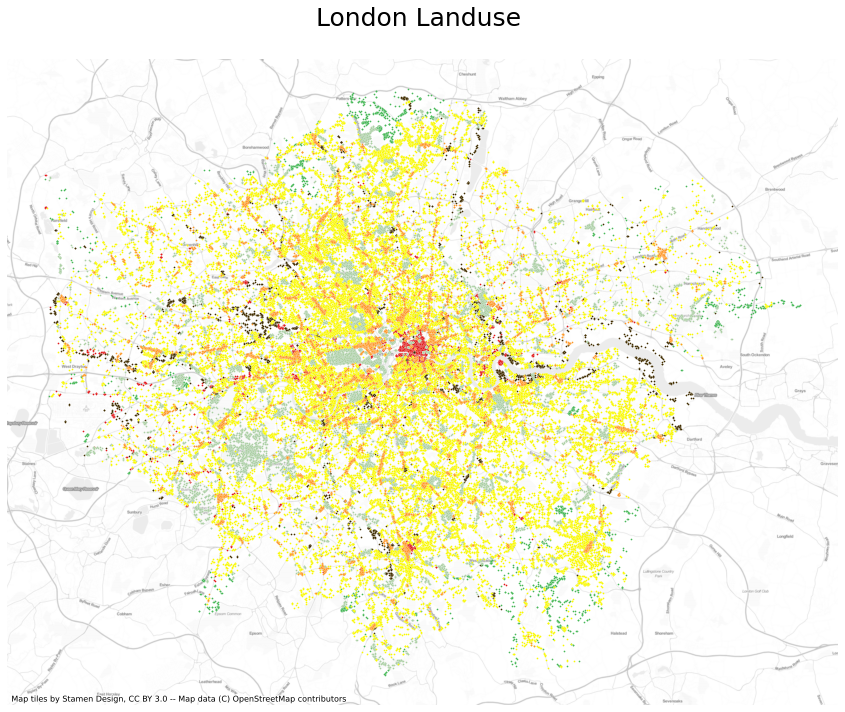

In [29]:
gdf1 = gpd.GeoDataFrame(image_commercial, geometry=gpd.points_from_xy(image_commercial.wgs84_long,
                                                                image_commercial.wgs84_lat))
gdf1 =gdf1.set_crs(epsg=4326)
# contextily only use 3857 
gdf1 = gdf1.to_crs(epsg=3857)

gdf2 = gpd.GeoDataFrame(image_farmland, geometry=gpd.points_from_xy(image_farmland.wgs84_long,
                                                                    image_farmland.wgs84_lat))
gdf2 =gdf2.set_crs(epsg=4326)
# contextily only use 3857 
gdf2 = gdf2.to_crs(epsg=3857)

gdf3 = gpd.GeoDataFrame(image_industrial, geometry=gpd.points_from_xy(image_industrial.wgs84_long,
                                                                image_industrial.wgs84_lat))
gdf3 =gdf3.set_crs(epsg=4326)
# contextily only use 3857 
gdf3 = gdf3.to_crs(epsg=3857)

gdf4 = gpd.GeoDataFrame(image_park, geometry=gpd.points_from_xy(image_park.wgs84_long,
                                                                image_park.wgs84_lat))
gdf4 =gdf4.set_crs(epsg=4326)
# contextily only use 3857 
gdf4 = gdf4.to_crs(epsg=3857)

gdf5 = gpd.GeoDataFrame(image_residential, geometry=gpd.points_from_xy(image_residential.wgs84_long,
                                                                image_residential.wgs84_lat))
gdf5 =gdf5.set_crs(epsg=4326)
# contextily only use 3857 
gdf5 = gdf5.to_crs(epsg=3857)

gdf6 = gpd.GeoDataFrame(image_retail, geometry=gpd.points_from_xy(image_retail.wgs84_long,
                                                                   image_retail.wgs84_lat))
gdf6 =gdf6.set_crs(epsg=4326)
# contextily only use 3857 
gdf6 = gdf6.to_crs(epsg=3857)
# '#e31a1c','#47b958','#412d00','#acd0a5','#fafa01','#fe9929'
fig,ax=plt.subplots(figsize=(15, 10))
landuseplot1=gdf1.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                       edgecolor='white',ax=ax, color = '#e31a1c',markersize=3)
landuseplot2=gdf2.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                       edgecolor='white',ax=ax, color = '#47b958',markersize=3)
landuseplot3=gdf3.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                       edgecolor='white',ax=ax, color = '#412d00',markersize=3)
landuseplot4=gdf4.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                       edgecolor='white',ax=ax, color = '#acd0a5',markersize=3)
landuseplot5=gdf5.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                       edgecolor='white',ax=ax, color = '#fafa01',markersize=3)
landuseplot6=gdf6.plot(figsize=(8, 8), alpha=1, linewidth=0.1,
                       edgecolor='white',ax=ax, color = '#fe9929',markersize=3)
# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# set the title
ax.set_title("London Landuse \n",fontsize= 25)
# remove the axis
ax.set_axis_off()
# tighten the layout
fig.tight_layout()

fig.savefig("datasets/figure/landuse_point.jpg", bbox_inches='tight', pad_inches=0.5, dpi=300)

### 1.4 Function for decide random array

In [ ]:
# Select n images randomly
def select(image_area, n, file_name):
    image_area = np.array(image_area)
    rand_arr = np.arange(image_area.shape[0])
    np.random.shuffle(rand_arr)
    subset = image_area[rand_arr[0:n]]

    subset = pd.DataFrame(subset)
    subset.rename(columns={0:'Geograph.U', 1:'wgs84_lat', 2:'wgs84_long',
                           3:'Predicted.', 4:'geometry'}, inplace = True)
    subset['Predicted.'] = subset['Predicted.'].astype("float64")
    subset.to_csv('datasets/created_datasets/%s.csv'%(file_name), index=False, header=True)
    return subset

### 2 Request URL and save to local file folder

* Write a **function for request image URL**
* Use **for loop** to save all images of one category to a file folder
* Apply the function to all image points with known landuse characteristic

### 2.1 Extract URL

In [ ]:
def extract(image_area):
    url_list = image_area[["Geograph.U"]].values.tolist()
    urls = []
    for i in url_list:
        urls.append(i[0])
    return urls

### 2.2 Request URL and save images

In [ ]:
import  requests
from lxml import etree
import time

In [ ]:
def request(tag, image_area, train):
    urls = extract(image_area)
    count = 0
    for i in urls:
        image_url = i
        try:
            r = requests.get(image_url) 
            time.sleep(1)
            html = etree.HTML(r.text)
            img_url = html.xpath('//img/@src')[0]

            img = requests.get(img_url) 
            # save image 'b'(media content)
            file_name = img_url.split('/')[-1]
            if count < train:
                with open('train/%s/%s'%(tag, file_name), 'wb') as f:
                    f.write(img.content)
            else:
                with open('test/%s/%s'%(tag, file_name), 'wb') as f:
                    f.write(img.content)
            count += 1
        except:
            pass

#### parameters

* image_park
* image_farmland 
* image_industrial 
* image_commercial 
* image_residential
* image_retail

In [ ]:
'''
park_1000 = select(image_park, 1000)
request('park', park_1000, 700)
farmland_1000 = select(image_farmland, 1000)
request('farmland', farmland_1000, 700)
industrial_1000 = select(image_industrial, 1000)
request('industrial', industrial_1000)
commercial_1000 = select(image_commercial, 1000)
request('commercial', commercial_1000)
residential_1000 = select(image_residential, 1000)
request('residential', residential_1000)
retail_1000 = select(image_retail, 1000)
request('retail', retail_1000)
'''

### 2.3 Try multiprocessing to speed up the process

* Can download thousands of images within less time
* Multiprocessing cannot set train/test datasets
* Should split by os module afterwards

In [ ]:
import os
import threading

##### 2.3.1 Function for crawling images

In [ ]:
def crawl(tag, urls, subset):
    '''function for multiprocessing to execute'''
    # image url list & write to file
    for url in urls: 
        try:
            headers={'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_0) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.56 Safari/535.11'}
            r=requests.get(url, headers=headers)
            html = etree.HTML(r.text)
            img_url = html.xpath('//img/@src')[0]

            img = requests.get(img_url) 
            # save image 'b'(media content)
            subset['id']=subset['Geograph.U']
            for i in range(len(subset)):
                subset['id'][i]=subset['Geograph.U'].str.split('/')[i][4]
           
            r = requests.get(url) 
            time.sleep(1)
            html = etree.HTML(r.text)
            img_url = html.xpath('//img/@src')[0]

            img = requests.get(img_url) 
            # save image 'b'(media content)

            df = subset[subset['id']==url.split('/')[-1]]
            lat = df.iat[0, 1]
            long = df.iat[0, 2]
            file_name = str(lat) +'_'+ str(long)
            with open('datasets/crawl_dataset/%s/%s.jpg'%(tag, file_name), 'wb') as f:
                f.write(img.content)
            
        except:
            pass

def multithreading(n, n_img, image_area, tag):
    # set n_img/10 set of url_list
    subset = select(image_area, n_img, tag)
    urls = extract(subset)
    image_sublist = [urls[i:i+n] for i in range(0, len(urls), n)]
    
    # set 10 multithreads, threadlocal execute crawl function
    for i in range(0, 10):
        t=threading.Thread(target=crawl, args=(tag, image_sublist[i], subset))
        t.start()

In [ ]:
multithreading(200, 2000, image_commercial, 'commercial')
multithreading(190, 1900, image_farmland, 'farmland')
multithreading(200, 2000, image_industrial, 'industrial')
multithreading(150, 1500, image_park, 'park')
multithreading(180, 1800, image_residential, 'residential')
multithreading(200, 2000, image_retail, 'retail')

In [ ]:
path1 = 'datasets/crawl_dataset/commercial'
path2 = 'datasets/crawl_dataset/farmland'
path3 = 'datasets/crawl_dataset/industrial'
path4 = 'datasets/crawl_dataset/park'
path5 = 'datasets/crawl_dataset/residential'
path6 = 'datasets/crawl_dataset/retail'  

print(len(os.listdir(path1)), len(os.listdir(path2)), len(os.listdir(path3)),
     len(os.listdir(path4)), len(os.listdir(path5)), len(os.listdir(path6))) 
       

##### 2.3.3 Function for changing image directory (train folder and test folder)

In [ ]:
import random
import shutil
from shutil import copy2

In [ ]:
def split(tag):
    files = os.listdir('datasets/crawl_dataset/%s'%tag)
    num_initial = len(files)
    index_list = list(range(num_initial))
    random.shuffle(index_list)
    num = 0
    trainDir = 'datasets/train/%s'%tag
    testDir = 'datasets/test/%s'%tag

    for i in index_list:
        fileName = os.path.join('datasets/crawl_dataset/%s'%tag, files[i])
        if num < num_initial*0.8:
            copy2(fileName, trainDir)
        else:
            copy2(fileName, testDir)
        num += 1

In [ ]:
split('park')
split('farmland')
split('industrial')
split('commercial')
split('residential')
split('retail')